In [53]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import geocoder
import seaborn as sns
import dill
dill.dump_session('is733.db')

import os
import glob

In [6]:
data = pd.read_csv('crime.csv',encoding = 'ISO-8859-1',dtype='unicode')
dataframe = pd.DataFrame(data)
dataframe["Lat"] = pd.to_numeric(dataframe["Lat"])
dataframe["Long"] = pd.to_numeric(dataframe["Long"])
dataframe

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,02403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,03201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,02647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,00413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,03122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,01402,Vandalism,VANDALISM,C11,351,NaN,2018-10-02 20:40:00,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,03803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,2018-10-03 20:16:00,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,03301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,2018-10-03 19:32:00,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,00802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,2018-10-03 19:27:51,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,03410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


In [7]:
mean_lat = dataframe.groupby('STREET', as_index=True)['Lat'].mean()
mean_lat = pd.DataFrame({'Street':mean_lat.index,'Lat':mean_lat.values})
mean_lat.drop(mean_lat[mean_lat.Lat == -1].index, inplace=True)
mean_lat.set_index('Street', inplace=True)
mean_lat.dropna(how='all',inplace=True)
mean_lat.sort_values(by=['Street'])
mean_lat_df = mean_lat
mean_lat = mean_lat.to_dict()
mean_lat

{'Lat': {' ALBANY ST ': 42.333609999999965,
  ' BLUE HILL AVE ': 42.3173037,
  ' COLUMBUS AVE ': 42.34060371,
  ' COMMONWEALTH AVE ': 42.35053956000001,
  ' MASSACHUSETTS AVE ': 42.33253100000001,
  'A ST': 42.341112649471334,
  'ABBOT ST': 42.29691806624264,
  'ABBOTSFORD ST': 42.314530184724426,
  'ABBY RD': 42.36140263,
  'ABERDEEN ST': 42.346353440000016,
  'ACADEMY CT': 42.32081964999999,
  'ACADEMY HILL RD': 42.34726990039064,
  'ACADEMY RD': 42.32061024833333,
  'ACADEMY TER': 42.32082221,
  'ACADIA ST': 42.33782826,
  'ACHORN CIR': 42.30800713,
  'ACKLEY PL': 42.31107064333333,
  'ACORN ST': 42.35761285,
  'ADA ST': 42.28122151666667,
  'ADAIR RD': 42.35199540666667,
  'ADAMS ST': 42.2979542677337,
  'ADAMS TER': 42.29547164000001,
  'ADAMSON ST': 42.35808155380954,
  'ADANAC TER': 42.28696614,
  'ADDINGTON RD': 42.28953207599999,
  'ADDISON ST': 42.38568992172412,
  'ADELAIDE ST': 42.3174859285714,
  'ADELAIDE TER': 42.3179676,
  'ADELLA PL': 42.352569821428574,
  'ADRIAN ST':

In [8]:
mean_long = dataframe.groupby('STREET', as_index=True)['Long'].mean()
mean_long = pd.DataFrame({'Street':mean_long.index,'Long':mean_long.values})
mean_long.drop(mean_long[mean_long.Long == -1].index, inplace=True)
mean_long.set_index('Street', inplace=True)
mean_long.dropna(how='all',inplace=True)
mean_long.sort_values(by=['Street'])
mean_long_df = mean_long
mean_long = mean_long.to_dict()


In [9]:
#dataframe.dropna(subset=['STREET','Lat','Long'], how='all')
#dataframe.to_csv("data.csv")

for index, row in dataframe.iterrows():
    if pd.notnull(row["STREET"]) and pd.isnull(row["Lat"]) and pd.isnull(row["Long"]):
        dataframe.at[index,'Lat'] = mean_lat.get(row["STREET"])
        dataframe.at[index,'Long'] = mean_long.get(row["STREET"])

dataframe.dropna(subset=['STREET','Lat','Long'], thresh=2, inplace=True)
dataframe

#dataframe = dataframe[(dataframe.STREET.notnull()) & (dataframe.Lat.notnull()) & (dataframe.Long.notnull())]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,02403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,03201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,02647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,00413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,03122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"
5,I182080049,01402,Vandalism,VANDALISM,C11,351,NaN,2018-10-02 20:40:00,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,03803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,2018-10-03 20:16:00,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,03301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,2018-10-03 19:32:00,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,00802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,2018-10-03 19:27:51,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"
9,I182080044,03410,Towed,TOWED MOTOR VEHICLE,D4,621,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part Three,COMMONWEALTH AVE,42.348866,-71.089363,"(42.34886600, -71.08936284)"


In [10]:
for index1, row1 in dataframe.iterrows():
    if pd.to_numeric(row1["Lat"]) == -1 and pd.to_numeric(row1["Long"]) == -1:
        dataframe.drop(index1, inplace=True)
    if pd.isnull(row1["STREET"]) and pd.notnull(row1["Lat"]) and pd.notnull(row1["Long"]):
        g = geocoder.bing([row1["Lat"], row1["Long"]], method='reverse', key='AtJ0quSO4qFEBpWj5NAC6iBBegPnNATJFv9oMKGhmZhb_Dp1Sy0a0wqVOTVXXq7Z')
        dataframe.at[index1,'STREET'] = g.street
        dataframe.at[index1,'ZipCode'] = g.postal

In [40]:
dataframe.to_csv("cleaned_data.csv", index=False)

In [11]:
g = geocoder.bing([42.36148163,-71.05719146], method='reverse', key='AtJ0quSO4qFEBpWj5NAC6iBBegPnNATJFv9oMKGhmZhb_Dp1Sy0a0wqVOTVXXq7Z')
g.json

{'address': '45 Union St, Boston, MA 02108',
 'bbox': {'northeast': [42.365424717570676, -71.05008828700483],
  'southwest': [42.35769928242932, -71.06402771299517]},
 'city': 'Boston',
 'confidence': 7,
 'country': 'United States',
 'lat': 42.361562,
 'lng': -71.057058,
 'ok': True,
 'postal': '02108',
 'quality': 'Address',
 'raw': {'__type': 'Location:http://schemas.microsoft.com/search/local/ws/rest/v1',
  'bbox': [42.35769928242932,
   -71.06402771299517,
   42.365424717570676,
   -71.05008828700483],
  'name': '45 Union St, Boston, MA 02108',
  'point': {'type': 'Point', 'coordinates': [42.361562, -71.057058]},
  'address': {'addressLine': '45 Union St',
   'adminDistrict': 'MA',
   'adminDistrict2': 'Suffolk Co.',
   'countryRegion': 'United States',
   'formattedAddress': '45 Union St, Boston, MA 02108',
   'intersection': {'baseStreet': 'Union St',
    'secondaryStreet1': 'Marshall St',
    'secondaryStreet2': 'Hanover St',
    'intersectionType': 'Between',
    'displayName':

In [13]:
postal = []
for index1, row1 in dataframe.iterrows():
    g = geocoder.bing([row["Lat"],row["Long"]], method='reverse', key='AtJ0quSO4qFEBpWj5NAC6iBBegPnNATJFv9oMKGhmZhb_Dp1Sy0a0wqVOTVXXq7Z').json
    postal.append(g["postal"])

KeyboardInterrupt: 

In [14]:
for index,row in dataframe.iterrows():
    if pd.isnull(row["INCIDENT_NUMBER"]):
        dataframe.drop(row)
dataframe        

KeyError: '[nan nan nan nan nan nan nan nan nan nan nan nan nan None nan nan nan None] not found in axis'

In [16]:
#1st Visualization Data Creation
c2018 = 0 
c2017 = 0 
c2016 = 0
c2015 = 0
for index,row in dataframe.iterrows():
    if row["YEAR"] == '2018':
        c2018 += 1
    elif row["YEAR"] == '2017':
        c2017 += 1
    elif row["YEAR"] == '2016':
        c2016 += 1
    elif row["YEAR"] == '2015':
        c2015 += 1
        
columns = ['Year','Count']
list_of_lists = [
    [2018, c2018],
    [2017, c2017],
    [2016, c2016],
    [2015, c2015]
]
        
data1 = pd.DataFrame(list_of_lists, columns=columns)
data1



,Year,Count
0,2018,69260
1,2017,93865
2,2016,92069
3,2015,51219


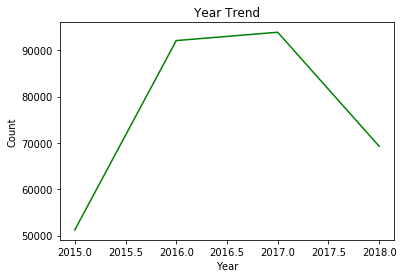

In [18]:
#1st Data Visualization
plt.plot(data1["Year"], data1["Count"], color='g')
#plt.plot(data1["Year"], pop_india, color='orange')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Trend')
plt.show()

In [27]:
#2nd Visualization Data Creation
data2_dict = {'January':0, 'February':0, 'March':0, 'April':0, 'May':0, 'June':0, 'July':0, 'August':0, 'September':0, 'October':0, 'November':0, 'December':0}

for index, row in dataframe.iterrows():
    if row["MONTH"] == '1':
        data2_dict['January'] = data2_dict['January'] + 1
    elif row["MONTH"] == '2':
        data2_dict['February'] = data2_dict['February'] + 1
    elif row["MONTH"] == '3':
        data2_dict['March'] = data2_dict['March'] + 1
    elif row["MONTH"] == '4':
        data2_dict['April'] = data2_dict['April'] + 1
    elif row["MONTH"] == '5':
        data2_dict['May'] = data2_dict['May'] + 1
    elif row["MONTH"] == '6':
        data2_dict['June'] = data2_dict['June'] + 1
    elif row["MONTH"] == '7':
        data2_dict['July'] = data2_dict['July'] + 1
    elif row["MONTH"] == '8':
        data2_dict['August'] = data2_dict['August'] + 1
    elif row["MONTH"] == '9':
        data2_dict['September'] = data2_dict['September'] + 1
    elif row["MONTH"] == '10':
        data2_dict['October'] = data2_dict['October'] + 1
    elif row["MONTH"] == '11':
        data2_dict['November'] = data2_dict['November'] + 1
    elif row["MONTH"] == '12':
        data2_dict['December'] = data2_dict['December'] + 1
        
month = [ k for k in data2_dict ]
month
count_month_crime = [  v for v in data2_dict.values()  ]
count

[22298,
 20178,
 22420,
 22566,
 24397,
 28702,
 32376,
 32709,
 31713,
 24691,
 22218,
 22145]

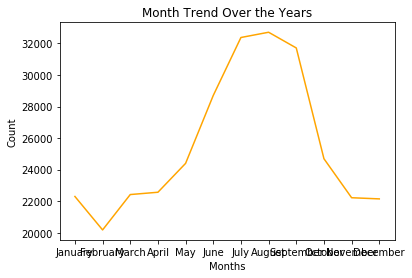

In [33]:
plt.plot(month, count_month_crime, color='orange')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Month Trend Over the Years')
plt.show()

In [104]:
#3rd Visualization Data Creation

data3_dict = {'Sunday':0, 'Monday':0, 'Tuesday':0, 'Wednesday':0, 'Thursday':0, 'Friday':0, 'Saturday':0}

for index, row in dataframe.iterrows():
    if row["DAY_OF_WEEK"] == 'Sunday':
        data3_dict['Sunday'] = data3_dict['Sunday'] + 1
    elif row["DAY_OF_WEEK"] == 'Monday':
        data3_dict['Monday'] = data3_dict['Monday'] + 1
    elif row["DAY_OF_WEEK"] == 'Tuesday':
        data3_dict['Tuesday'] = data3_dict['Tuesday'] + 1
    elif row["DAY_OF_WEEK"] == 'Wednesday':
        data3_dict['Wednesday'] = data3_dict['Wednesday'] + 1
    elif row["DAY_OF_WEEK"] == 'Thursday':
        data3_dict['Thursday'] = data3_dict['Thursday'] + 1
    elif row["DAY_OF_WEEK"] == 'Friday':
        data3_dict['Friday'] = data3_dict['Friday'] + 1
    elif row["DAY_OF_WEEK"] == 'Saturday':
        data3_dict['Saturday'] = data3_dict['Saturday'] + 1
   
        
day = [ k for k in data3_dict ]
day
count_day = [  v for v in data3_dict.values()  ]
count_day_normalized = [float(i)/sum(count_day) for i in count_day]


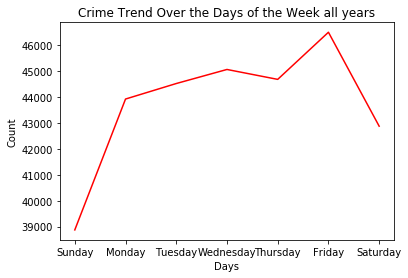

In [37]:
#3rd Visualization 

plt.plot(day, count_day, color='red')
#plt.plot(year, pop_india, color='orange')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Crime Trend Over the Days of the Week all years')
plt.show()

In [129]:
#Fire Dataset
                             
data_fire_18 = pd.concat(map(pd.read_csv, glob.glob(os.path.join('C:/Users/Kaushik/Desktop/IS_733/Fire/18', "*.csv"))))
data_fire_18['day'] = pd.to_datetime(data_fire_18['Alarm Date'], format='%m/%d/%Y').dt.day_name()
data_fire_18['month'] = pd.to_datetime(data_fire_18['Alarm Date'], format='%m/%d/%Y').dt.month

data_fire_17 = pd.concat(map(pd.read_csv, glob.glob(os.path.join('C:/Users/Kaushik/Desktop/IS_733/Fire/17', "*.csv"))))
data_fire_17['day'] = pd.to_datetime(data_fire_17['Alarm Date'], format='%m/%d/%Y', errors='coerce' ).dt.day_name()
data_fire_17['month'] = pd.to_datetime(data_fire_17['Alarm Date'], format='%m/%d/%Y',errors='coerce').dt.month

temp = pd.DataFrame()
for index, row in data_fire_17.iterrows():
    if pd.isnull(row['month']):
        temp = temp.append(row,ignore_index = True)
        data_fire_17.drop(index)
        
temp['month'] = pd.to_datetime(temp['Alarm Date'], format='%m/%d/%y').dt.month

data_fire_17 = data_fire_17.append(temp, ignore_index = True)
        

data_fire_16 = pd.read_csv(r"C:/Users/Kaushik/Desktop/IS_733/Fire/y2016.csv", encoding = 'ISO-8859-1',dtype='unicode')
data_fire_16['day'] = pd.to_datetime(data_fire_16['Alarm Date'], format='%m/%d/%y').dt.day_name()
data_fire_16['month'] = pd.to_datetime(data_fire_16['Alarm Date'], format='%m/%d/%y').dt.month
data_fire_15 = pd.read_csv(r"C:/Users/Kaushik/Desktop/IS_733/Fire/y2015.csv",  encoding = 'ISO-8859-1',dtype='unicode')
data_fire_15['day'] = pd.to_datetime(data_fire_15['Alarm Date'], format='%m/%d/%y').dt.day_name()
data_fire_15['month'] = pd.to_datetime(data_fire_15['Alarm Date'], format='%m/%d/%y').dt.month

complete_fire_data = pd.DataFrame()
complete_fire_data = complete_fire_data.append(data_fire_18, ignore_index = True) 
complete_fire_data = complete_fire_data.append(data_fire_17, ignore_index = True) 
complete_fire_data = complete_fire_data.append(data_fire_16, ignore_index = True) 
complete_fire_data = complete_fire_data.append(data_fire_15, ignore_index = True) 



D:\Anaconda Navigator\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [107]:
#4th Visualization Data Creation


day_fire_dict = {'Sunday':0, 'Monday':0, 'Tuesday':0, 'Wednesday':0, 'Thursday':0, 'Friday':0, 'Saturday':0}

for index, row in data_fire_18.iterrows():
    if row["day"] == 'Sunday':
        day_fire_dict['Sunday'] = day_fire_dict['Sunday'] + 1
    elif row["day"] == 'Monday':
        day_fire_dict['Monday'] = day_fire_dict['Monday'] + 1
    elif row["day"] == 'Tuesday':
        day_fire_dict['Tuesday'] = day_fire_dict['Tuesday'] + 1
    elif row["day"] == 'Wednesday':
        day_fire_dict['Wednesday'] = day_fire_dict['Wednesday'] + 1
    elif row["day"] == 'Thursday':
        day_fire_dict['Thursday'] = day_fire_dict['Thursday'] + 1
    elif row["day"] == 'Friday':
        day_fire_dict['Friday'] = day_fire_dict['Friday'] + 1
    elif row["day"] == 'Saturday':
        day_fire_dict['Saturday'] = day_fire_dict['Saturday'] + 1
        
for index, row in data_fire_17.iterrows():
    if row["day"] == 'Sunday':
        day_fire_dict['Sunday'] = day_fire_dict['Sunday'] + 1
    elif row["day"] == 'Monday':
        day_fire_dict['Monday'] = day_fire_dict['Monday'] + 1
    elif row["day"] == 'Tuesday':
        day_fire_dict['Tuesday'] = day_fire_dict['Tuesday'] + 1
    elif row["day"] == 'Wednesday':
        day_fire_dict['Wednesday'] = day_fire_dict['Wednesday'] + 1
    elif row["day"] == 'Thursday':
        day_fire_dict['Thursday'] = day_fire_dict['Thursday'] + 1
    elif row["day"] == 'Friday':
        day_fire_dict['Friday'] = day_fire_dict['Friday'] + 1
    elif row["day"] == 'Saturday':
        day_fire_dict['Saturday'] = day_fire_dict['Saturday'] + 1
        
for index, row in data_fire_16.iterrows():
    if row["day"] == 'Sunday':
        day_fire_dict['Sunday'] = day_fire_dict['Sunday'] + 1
    elif row["day"] == 'Monday':
        day_fire_dict['Monday'] = day_fire_dict['Monday'] + 1
    elif row["day"] == 'Tuesday':
        day_fire_dict['Tuesday'] = day_fire_dict['Tuesday'] + 1
    elif row["day"] == 'Wednesday':
        day_fire_dict['Wednesday'] = day_fire_dict['Wednesday'] + 1
    elif row["day"] == 'Thursday':
        day_fire_dict['Thursday'] = day_fire_dict['Thursday'] + 1
    elif row["day"] == 'Friday':
        day_fire_dict['Friday'] = day_fire_dict['Friday'] + 1
    elif row["day"] == 'Saturday':
        day_fire_dict['Saturday'] = day_fire_dict['Saturday'] + 1

for index, row in data_fire_15.iterrows():
    if row["day"] == 'Sunday':
        day_fire_dict['Sunday'] = day_fire_dict['Sunday'] + 1
    elif row["day"] == 'Monday':
        day_fire_dict['Monday'] = day_fire_dict['Monday'] + 1
    elif row["day"] == 'Tuesday':
        day_fire_dict['Tuesday'] = day_fire_dict['Tuesday'] + 1
    elif row["day"] == 'Wednesday':
        day_fire_dict['Wednesday'] = day_fire_dict['Wednesday'] + 1
    elif row["day"] == 'Thursday':
        day_fire_dict['Thursday'] = day_fire_dict['Thursday'] + 1
    elif row["day"] == 'Friday':
        day_fire_dict['Friday'] = day_fire_dict['Friday'] + 1
    elif row["day"] == 'Saturday':
        day_fire_dict['Saturday'] = day_fire_dict['Saturday'] + 1
        
count_day_fire = [  v for v in day_fire_dict.values()  ]
count_day_fire_normalized = [float(i)/sum(count_day_fire) for i in count_day_fire]

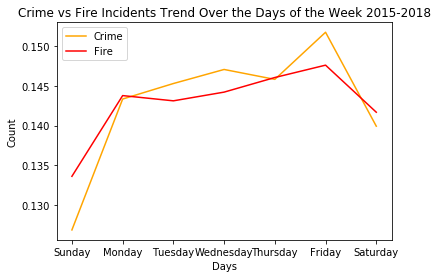

In [110]:
#4th Visualization


plt.plot(day, count_day_normalized, color='orange',label='Crime')
plt.plot(day, count_day_fire_normalized, color='red',label='Fire')
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Crime vs Fire Incidents Trend Over the Days of the Week 2015-2018')
plt.legend(loc='upper left')
plt.show()

In [130]:
#5th Visualization Data Creation

month_fire_dict = {'January':0, 'February':0, 'March':0, 'April':0, 'May':0, 'June':0, 'July':0, 'August':0, 'September':0, 'October':0, 'November':0, 'December':0}

for index, row in complete_fire_data.iterrows():
    if int(row["month"]) == '1':
        month_fire_dict['January'] = month_fire_dict['January'] + 1
    elif row["month"] == '2':
        month_fire_dict['February'] = month_fire_dict['February'] + 1
    elif row["month"] == '3':
        month_fire_dict['March'] = month_fire_dict['March'] + 1
    elif row["month"] == '4':
        month_fire_dict['April'] = month_fire_dict['April'] + 1
    elif row["month"] == '5':
        month_fire_dict['May'] = month_fire_dict['May'] + 1
    elif row["month"] == '6':
        month_fire_dict['June'] = month_fire_dict['June'] + 1
    elif row["month"] == '7':
        month_fire_dict['July'] = month_fire_dict['July'] + 1
    elif row["month"] == '8':
        month_fire_dict['August'] = month_fire_dict['August'] + 1
    elif row["month"] == '9':
        month_fire_dict['September'] = month_fire_dict['September'] + 1
    elif row["month"] == '10':
        month_fire_dict['October'] = month_fire_dict['October'] + 1
    elif row["month"] == '11':
        month_fire_dict['November'] = month_fire_dict['November'] + 1
    elif row["month"] == '12':
        month_fire_dict['December'] = month_fire_dict['December'] + 1
        

count_month_fire = [  v for v in month_fire_dict.values()  ]
count_month_fire
#count_month_fire_normalized = [float(i)/sum(count_month_fire) for i in count_month_fire]


ValueError: cannot convert float NaN to integer

In [124]:
complete_fire_data.to_csv("complete.csv", index=False)